In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pycountry
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
from sklearn.cluster import KMeans

spotify = pd.read_csv('spotify_cleaned.csv')

In [47]:
spotify['snapshot_date'] = pd.to_datetime(spotify['snapshot_date'])

spotify = spotify[spotify['spotify_id'] != '5AE763tJ5Wjs9HwxJfJfkh']

# print(spotify.dtypes)
# print(spotify.shape)

In [49]:
x = spotify[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'mode', 'duration_ms']]
y = spotify['popularity']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

model = DecisionTreeRegressor(random_state = 42, max_depth = 10)

model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

[Text(0.5190445421589689, 0.9545454545454546, 'loudness <= -5.928\nsquared_error = 273.431\nsamples = 112030\nvalue = 77.535'),
 Text(0.2740500805585392, 0.8636363636363636, 'danceability <= 0.647\nsquared_error = 282.641\nsamples = 60486\nvalue = 74.998'),
 Text(0.1545045649838883, 0.7727272727272727, 'acousticness <= 0.691\nsquared_error = 304.026\nsamples = 26771\nvalue = 78.22'),
 Text(0.06864258861439312, 0.6818181818181818, 'tempo <= 77.647\nsquared_error = 312.685\nsamples = 16921\nvalue = 75.149'),
 Text(0.028531149301825993, 0.5909090909090909, 'duration_ms <= 230109.0\nsquared_error = 171.883\nsamples = 1945\nvalue = 84.129'),
 Text(0.016245972073039742, 0.5, 'speechiness <= 0.116\nsquared_error = 132.164\nsamples = 1730\nvalue = 86.448'),
 Text(0.009935553168635876, 0.4090909090909091, 'instrumentalness <= 0.027\nsquared_error = 81.96\nsamples = 1503\nvalue = 88.811'),
 Text(0.006981740064446832, 0.3181818181818182, 'instrumentalness <= 0.0\nsquared_error = 51.224\nsamples =

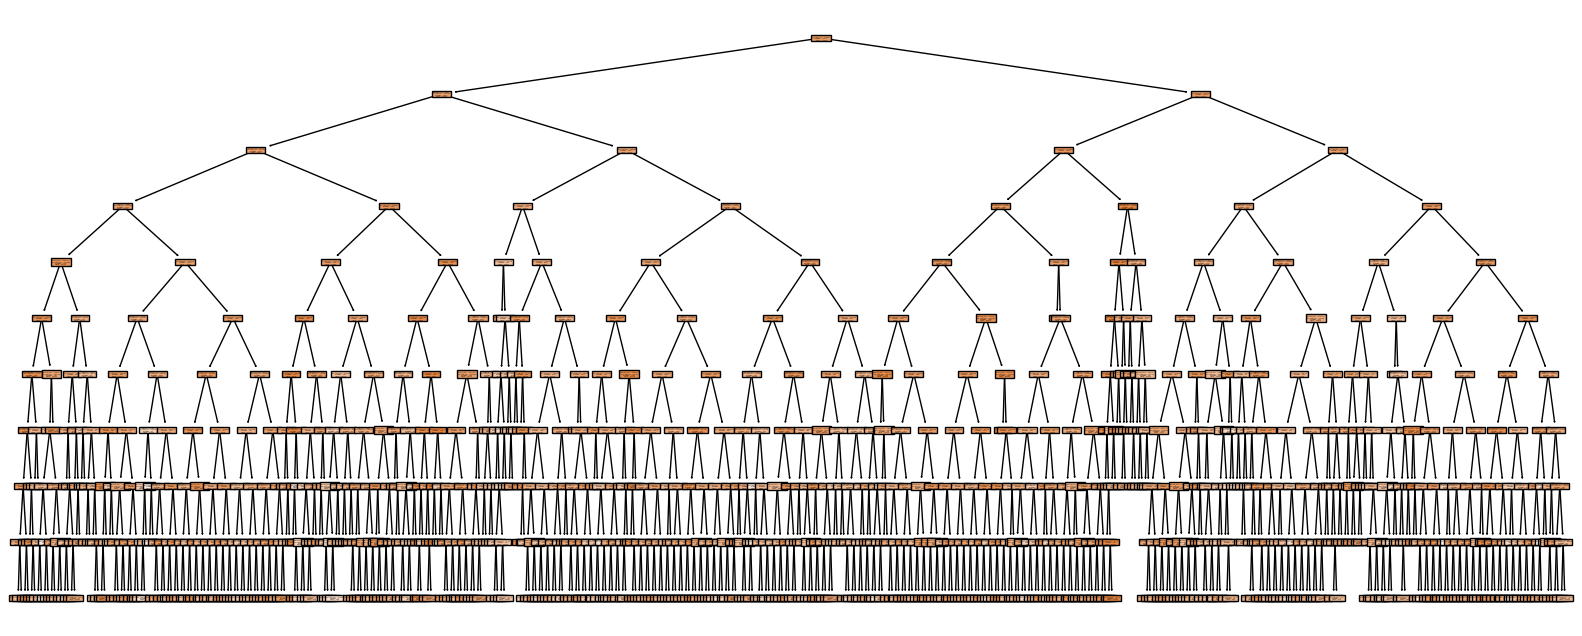

In [50]:
plt.figure(figsize = (20, 8))

plot_tree(model, feature_names = x_train.columns.to_list(), filled = True)

In [39]:
train_df, test_df = train_test_split(spotify, test_size = 0.3, random_state = 42)

x_train = train_df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
x_test = test_df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

y_train = train_df[['popularity']]
y_test = test_df[['popularity']]

(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

(((112030, 9), (112030, 1)), ((48014, 9), (48014, 1)))

In [40]:
model = LinearRegression()

model_fit = model.fit(x_train, y_train) # performing regression

round(model.score(x_train, y_train), 2)

0.04

In [7]:
# model = LinearRegression()

# model.fit(x_train, y_train)
# model.()
# # y_pred = model.predict(x_test)

# # print('Coefficients: \n', model.coef_)